<a href="https://colab.research.google.com/github/hssya/SPS-Project/blob/main/Copy_of_NumpyTFandVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy, TF, and Visualization

## Start by importing necessary packages
We will begin by importing necessary libraries for this notebook. Run the cell below to do so.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from scipy.special import erf

## Visualizations

Visualization is a key factor in understanding deep learning models and their behavior. Typically, pyplot from the matplotlib package is used, capable of visualizing series and 2D data.

Below is an example of visualizing series data.

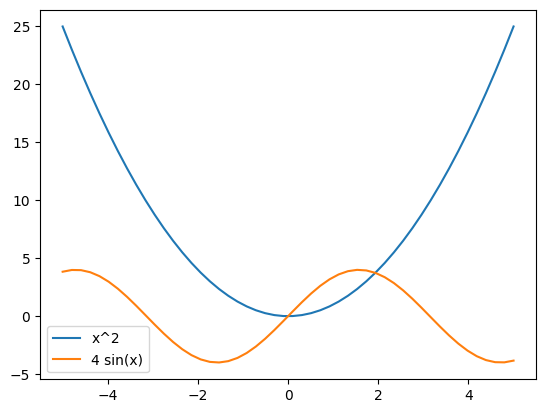

In [ ]:
x = np.linspace(-5, 5, 50) # create a linear spacing from x = -5.0 to 5.0 with 50 steps

y1 = x**2      # create a series of points {y1}, which corresponds to the function f(x) = y^2
y2 = 4*np.sin(x) # create another series of points {y2}, which corresponds to the function f(x) = 4*sin(x)  NOTE: we have to use np.sin and not math.sin as math.sin will only act on individual values
# to use math.sin, we could have used a list comprehension instead: y2 = [math.sin(xi) for xi in x]

# by default, matplotlib will behave like MATLAB with hold(True), overplotting until a new figure object is created
plt.plot(x, y1, label="x^2")        # plot y1 with x as the x-axis series, and label the line "x^2"
plt.plot(x, y2, label="4 sin(x)")   # plot y2 with x as the x-axis series, and label the line "4 sin(x)"
plt.legend()                        # have matplotlib show the label on the plot

More complex formatting can be added to increase the visual appeal and readability of plots (especially for paper quality figures).
To try this out, let's consider plotting a few of the more common activation functions used in machine learning.
Below, plot the following activation functions for $x\in[-4, 4]$:


*   ReLU: $max(x, 0)$
*   Leaky-ReLU: $max(0.1\cdot x, x)$
*   Sigmoid: $\sigma(x) = 1/(1 + e^{-x})$
*   Hyperbolic Tangent: $\mathrm{tanh}(x) = (e^{x} - e^{-x})/(e^{x} + e^{-x})$
*   SiLU: $x \cdot \sigma(x)$
*   GeLU: $x \cdot \frac{1}{2} \left(1 + \mathrm{erf}\left(\frac{x}{\sqrt{2}}\right)\right)$
*   tanh GELU: $x \cdot \frac{1}{2} \left(1 + \mathrm{tanh}\left(\frac{x}{\sqrt{2}}\right)\right)$

Plot the GELU and tanh GELU using the same color, but with tanh using a dashed line (tanh is a common approximation as the error-function is computationally expensive to compute).
You may also need to adjust the legend to make it easier to read.
I recommend using ChatGPT to help find the formatting options here.

**Question 1**



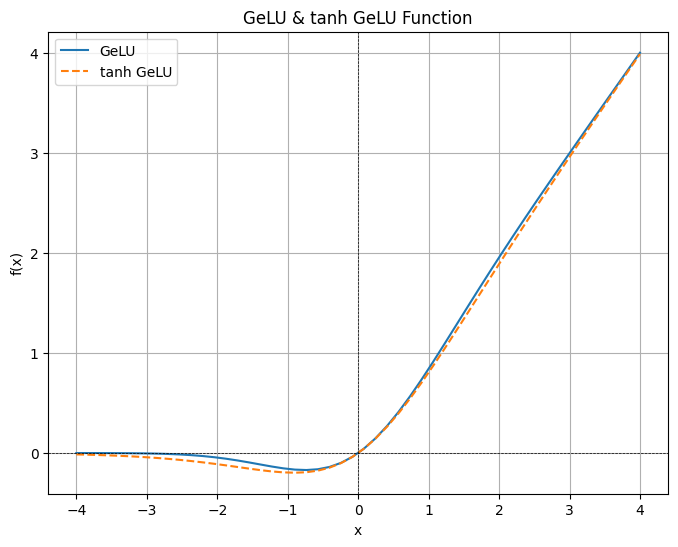

In [ ]:
x = np.linspace(-4, 4, 50) # create a linear spacing from x = -4.0 to 4.0 with 50 steps
# create and plot the functions below

##ReLU:max(x,0)
def relu(x):
    return np.maximum(x, 0)
y1 = relu(x)

##Leaky-ReLU
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)
y2 = leaky_relu(x)

##Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y3 = sigmoid (x)

##Hyperbolic Tangent
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
y4 = tanh(x)

##SiLU
def silu(x):
    return x*sigmoid (x)
y5 = silu(x)

##GeLU
def gelu(x):
    return (1/2) * x * (1 + erf(x / np.sqrt(2)))
y6 = gelu(x)

##GeLU
def tanh_gelu(x):
    return (1/2) * x * (1 + tanh(x / np.sqrt(2)))
y7 = tanh_gelu(x)


# Create the plot only with GeLU and tanh GeLU
plt.figure(figsize=(8, 6))
plt.plot(x, y6, label='GeLU')
plt.plot(x, y7, label='tanh GeLU', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('GeLU & tanh GeLU Function')
plt.legend()
plt.grid(True)
plt.show()

Answer to the following questions from the the plot you just created:


1.   Which activation function is the least computationally expensive to compute?
2.   Are there better choices to ensure more stable training? What downfalls do you think it may have?
3.   Are there any cases where you would not want to use either activation function?



**Question 2**

Answer:

1. As above activation functions, ReLU costs least computational expense. Because its mathematical operation is simpler than the other activation functions, and it do not involve the complex exponential calculations.

2. One way to improve stability is combining normalnization techniques and specific activation functions. For example, batch normalization with ReLU applies batch normalization before ReLU activation function, which can help stabilize training by normalizing the activations and controlling internal covariate shift. The disadvantages are the increase of training time and being sensitive to the batch sizes.

3. When we want our output is a linear function of its input, we don't want to use activation functions.

### Visualizing 2D data

In many cases, we also want the ability to visualize multi-dimensional data such as images. To do so, matplotlib has the imshow method, which can visualize single channel data with a heatmap, or RGB data with color.

Let's consider visualizing the first 8 training images from the MNIST dataset. MNIST consists of hand drawn digits with their corresponding labels (a number from 0 to 9).

We will use the tensorflow keras dataset library to load the dataset, and then visualize the images with a matplotlib subplot.
Because we have so many images, we should arrange them in a grid (4 horizontal, 2 vertical), and plot each image in a loop.
Furthermore, we can append the label to each image using the matplotlib utility.


11490434/11490434 [==============================] - 0s 0us/step


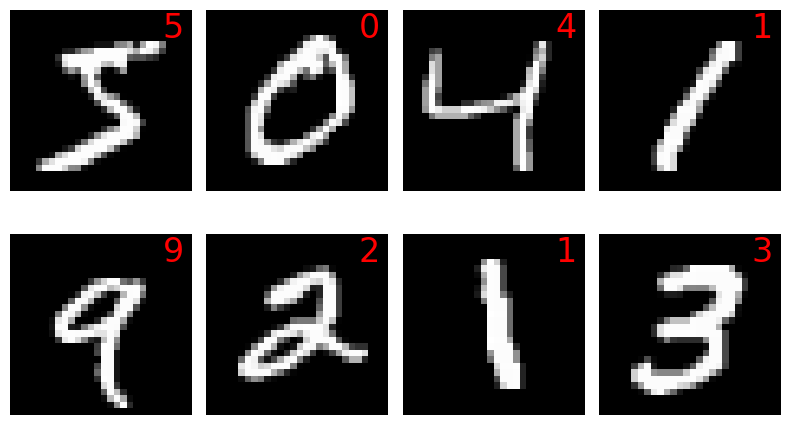

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Define the grid dimensions
rows, cols = 2, 4

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(8, 5))

# Iterate through the grid
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        ax = axes[i, j]

        # Display the image
        ax.imshow(train_images[index], cmap='gray')

        # Display the label on top of the image in red text
        ax.text(0.9, 0.9, str(train_labels[index]), color='red',
                transform=ax.transAxes, fontsize=24,
                ha='center', va='center')

        # Turn off axis labels
        ax.axis('off')

# Adjust spacing and layout
plt.tight_layout()

Another popular image dataset for benchmarking and evaluation is CFAR-10. This dataset consists of small (32 x 32 pixel) RGB images of objects that fall into one of 10 classes:

0.   airplane
1.   automobile
2.   bird
3.   cat
4.   deer
5.   dog
6.   frog
7.   horse
8.   ship
9.  truck


Plot the first 32 images in the dataset using the same method above.



**Question 3**

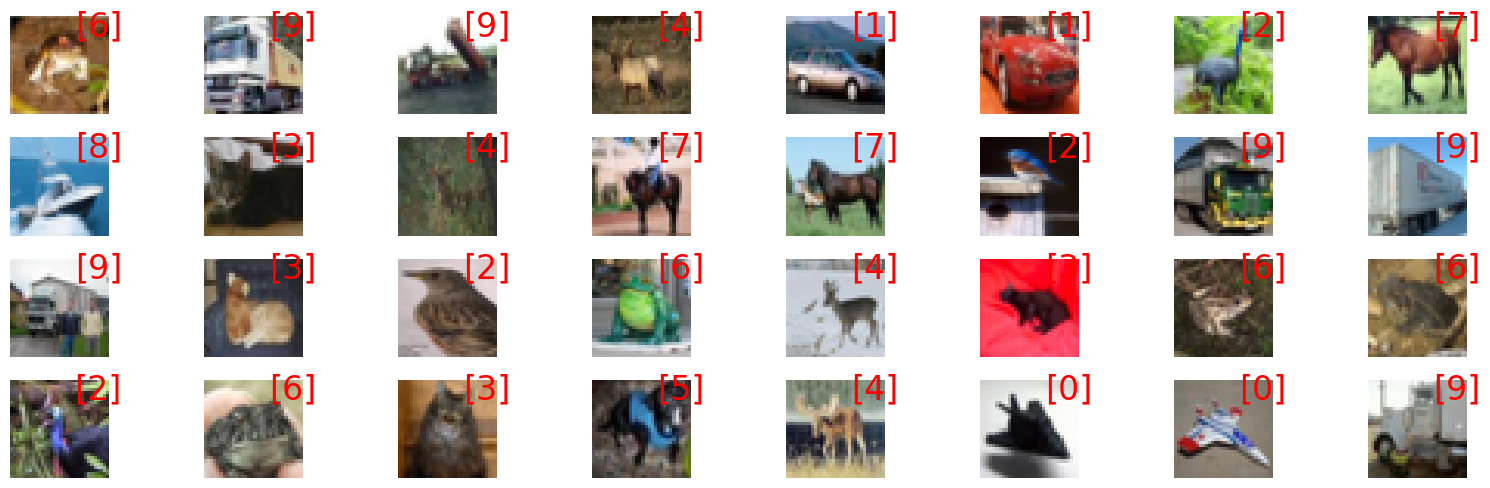

In [ ]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# add your plotting code below


# Define the grid dimensions
rows, cols = 4, 8

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 5))

# Iterate through the grid
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        ax = axes[i, j]

        # Display the image
        ax.imshow(train_images[index], cmap='gray')

        # Display the label on top of the image in red text
        ax.text(0.9, 0.9, str(train_labels[index]), color='red',
                transform=ax.transAxes, fontsize=24,
                ha='center', va='center')

        # Turn off axis labels
        ax.axis('off')

# Adjust spacing and layout
plt.tight_layout()

### Visualizing Tensors

Aside from visualzing linear functions and images, we can also visualize entire tensors from DL models.

In [ ]:
# first, let's download an existing model to inspect
model = tf.keras.applications.VGG16(weights='imagenet')

# can then print the summary of what the model is composed of
print(model.summary())

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# we can also print the model layers based on index to better understand the structure
for i,layer in enumerate(model.layers):
  print(f"{i}: {layer}")

0: <keras.engine.input_layer.InputLayer object at 0x79efd88dd5d0>
1: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd88dd9c0>
2: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efdb0d32e0>
3: <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x79efd5924370>
4: <keras.layers.convolutional.conv2d.Conv2D object at 0x79f07ea499f0>
5: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd5924670>
6: <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x79efd5886b90>
7: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd5884be0>
8: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd5884df0>
9: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd5887640>
10: <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x79efd59a72e0>
11: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd5886050>
12: <keras.layers.convolutional.conv2d.Conv2D object at 0x79efd5884a00>
13: <keras.layers.convolutional.conv2d.Conv2D object at 0x

Not all of these layers contain weights, for example, MaxPooling2D is a stateless operation, and so is Flatten.
Conv2D and Dense are the two layer types that can be visualized.
That said, let's visualize the filter kernels in the first convoluton layer.

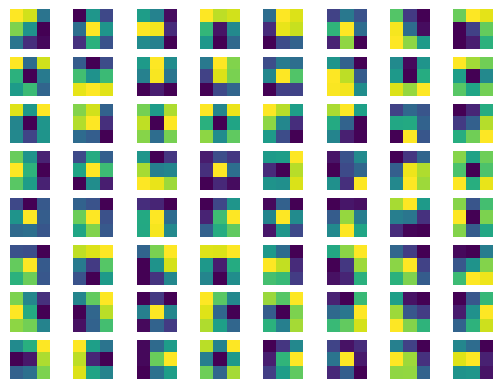

In [ ]:
# next we can extract som
layer = model.layers[1] # Get the first convolutional layer
weights = layer.get_weights()[0]

n_filters = weights.shape[-1]

for i in range(n_filters):
    plt.subplot(8, 8, i+1)  # Assuming 64 filters, adjust if necessary
    plt.imshow(weights[:, :, 0, i], cmap="viridis")
    plt.axis('off')

Aside from visualizing the weights directly, we can also compute and visualize the weight distribution using a histogram.

weight tensor has mean: -0.0024379086680710316 and variance: 0.04272466152906418


(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,
         2.,  7.,  2.,  4.,  7.,  6.,  6., 11.,  7.,  9., 12.,  6.,  9.,
        17., 11., 14., 10., 23., 18., 14., 15., 25., 20., 25., 38., 35.,
        38., 44., 32., 41., 42., 44., 38., 36., 32., 42., 40., 31., 23.,
        52., 32., 28., 52., 35., 24., 26., 40., 44., 45., 46., 43., 43.,
        42., 31., 24., 25., 18., 26., 23., 16., 18., 14., 15., 16.,  7.,
        10., 12., 14., 10.,  5.,  9., 10.,  3.,  7.,  4.,  2.,  1.,  2.,
         3.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([-0.67140007, -0.65860093, -0.64580172, -0.63300258, -0.62020344,
        -0.60740429, -0.59460509, -0.58180594, -0.5690068 , -0.55620766,
        -0.54340845, -0.53060931, -0.51781017, -0.50501096, -0.49221182,
        -0.47941267, -0.4666135 , -0.45381436, -0.44101518, -0.42821604,
        -0.41541687, -0.40261772, -0.38981855, -0.37701941, -0.36422023,
        -0.35142106, -0.33862191, -0.32582274, -0.3130236 , -0.300224

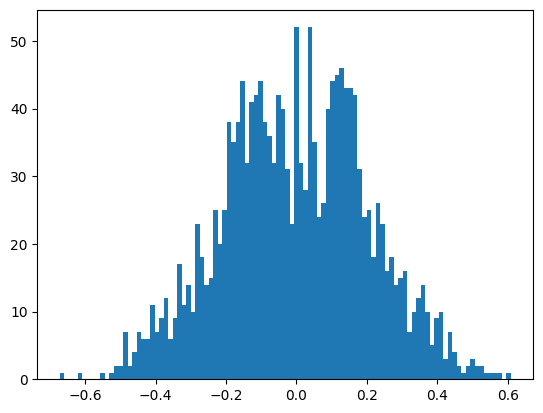

In [ ]:

# we can use the mean and var (variance) functions built in to calculate some simple statistics
print(f"weight tensor has mean: {weights.mean()} and variance: {weights.var()}")

# we need to call .flatten() on the tensor so that all the histogram sees them as a 1D array. Then we can plot with 100 bins to get a bit more resolution in the histogram.
plt.hist(weights.flatten(), bins=100)

Look through the other weight tensors in the network and note any patterns that can be observed. Plot some examples in a subplot grid (include at least 4 plots).
You can also overplot on the same subplot if you find that helpful for visualization.



**Question 4**

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,
         2.,  7.,  2.,  4.,  7.,  6.,  6., 11.,  7.,  9., 12.,  6.,  9.,
        17., 11., 14., 10., 23., 18., 14., 15., 25., 20., 25., 38., 35.,
        38., 44., 32., 41., 42., 44., 38., 36., 32., 42., 40., 31., 23.,
        52., 32., 28., 52., 35., 24., 26., 40., 44., 45., 46., 43., 43.,
        42., 31., 24., 25., 18., 26., 23., 16., 18., 14., 15., 16.,  7.,
        10., 12., 14., 10.,  5.,  9., 10.,  3.,  7.,  4.,  2.,  1.,  2.,
         3.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([-0.67140007, -0.65860093, -0.64580172, -0.63300258, -0.62020344,
        -0.60740429, -0.59460509, -0.58180594, -0.5690068 , -0.55620766,
        -0.54340845, -0.53060931, -0.51781017, -0.50501096, -0.49221182,
        -0.47941267, -0.4666135 , -0.45381436, -0.44101518, -0.42821604,
        -0.41541687, -0.40261772, -0.38981855, -0.37701941, -0.36422023,
        -0.35142106, -0.33862191, -0.32582274, -0.3130236 , -0.300224

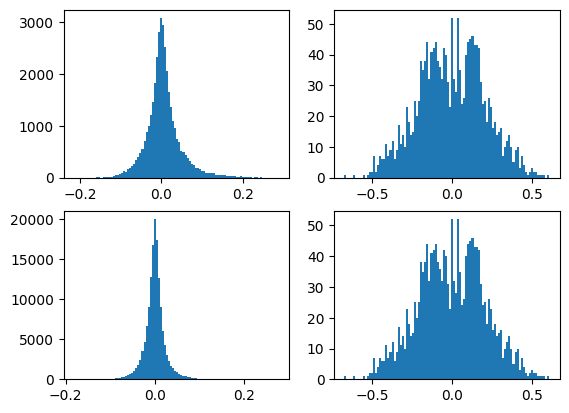

In [ ]:
from tensorflow.keras.applications import VGG16



model = tf.keras.applications.VGG16(weights='imagenet')


layer1 = model.layers[2] # Get the second convolutional layer
weights1 = layer1.get_weights()[0]


layer2 = model.layers[3] # Get the second convolutional layer
weights2 = layer.get_weights()[0]

n_filters2 = weights2.shape[-1]


layer3 = model.layers[5] # Get the second convolutional layer
weights3 = layer3.get_weights()[0]

n_filters = weights3.shape[-1]

layer4 = model.layers[6] # Get the second convolutional layer
weights4 = layer.get_weights()[0]

n_filters4 = weights.shape[-1]

# Create a 2x2 grid of subplots (2 row, 2 columns)
plt.subplot(2, 2, 1)  # Subplot 1
#plt.figure(figsize=(6, 6))
plt.hist(weights1.flatten(), bins=100)
#plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 2)
plt.hist(weights2.flatten(), bins=100)
#plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 3)
plt.hist(weights3.flatten(), bins=100)
#plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 4)
plt.hist(weights4.flatten(), bins=100)

# Create a figure and a grid of subplots
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot data on the subplots
#axes[0, 0].plt.hist(weights1.flatten(), bins=100)
#axes[0, 0].set_title('Sin(x)')

#axes[0, 1].plot(x, y2, 'r')
#axes[0, 1].set_title('Cos(x)')

#axes[1, 0].plot(x, y3, 'g')
#axes[1, 0].set_title('Tan(x)')


We can also visualize the activations within the network, this is done by applying a forward pass with a data input, and extracting the intermediate result. Below is an example output from the first convolution layer.

1/1 [==============================] - 0s 358ms/step


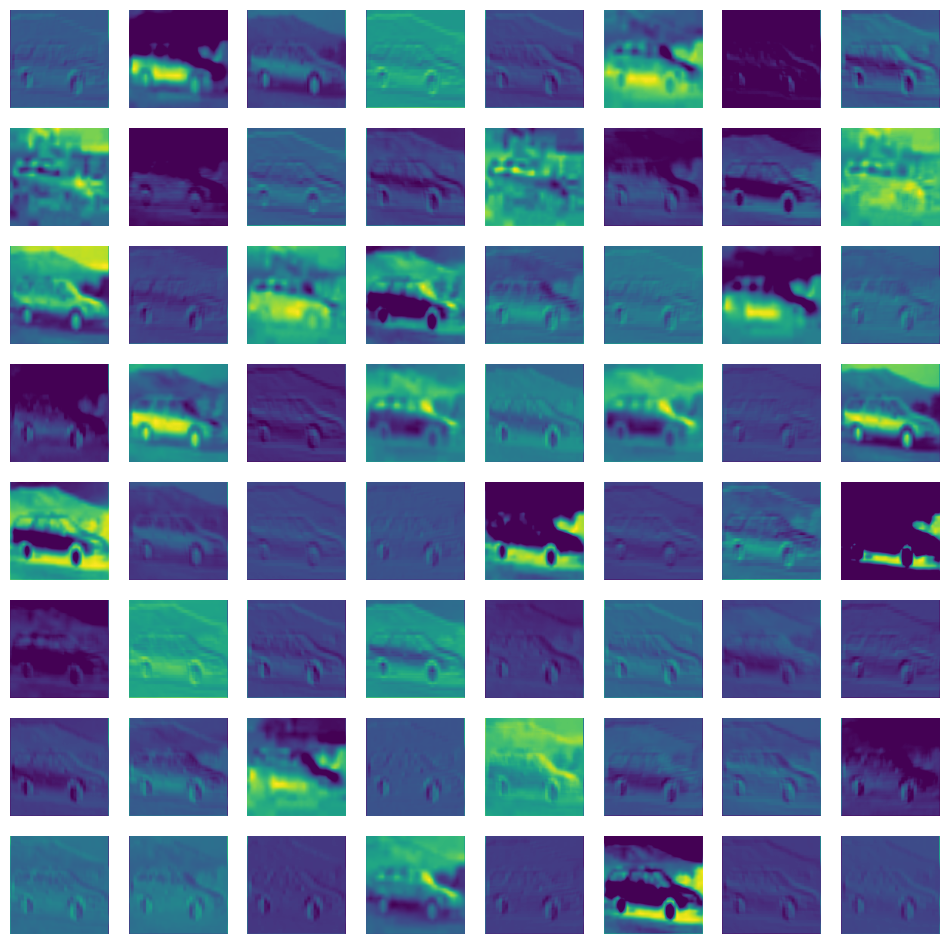

In [ ]:
# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

layer = model.layers[1] # Get the first convolutional layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
activation = intermediate_layer_model.predict(train_images_resized)

# get the feature count from the activations
n_features = activation.shape[-1]

# Set the figure size
plt.figure(figsize=(12, 12))

for i in range(n_features):
    plt.subplot(8, 8, i+1)  # Assuming 64 features, adjust if necessary
    plt.imshow(activation[0, :, :, i], cmap="viridis")
    plt.axis('off')

Using the above code for the forward pass, and the layer indices, plot the activation distributions for the final three dense layers.

**Question 5**

1/1 [==============================] - 1s 1s/step


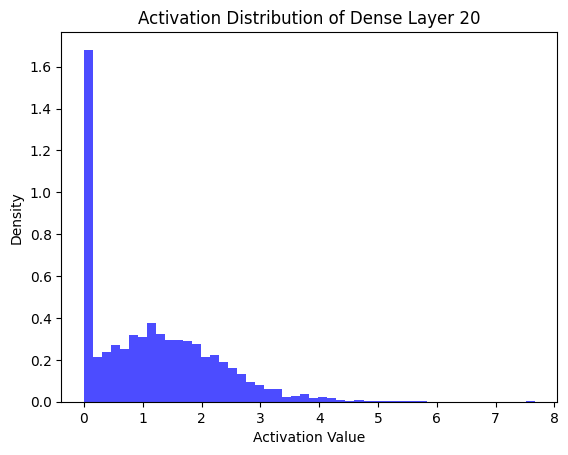

1/1 [==============================] - 2s 2s/step


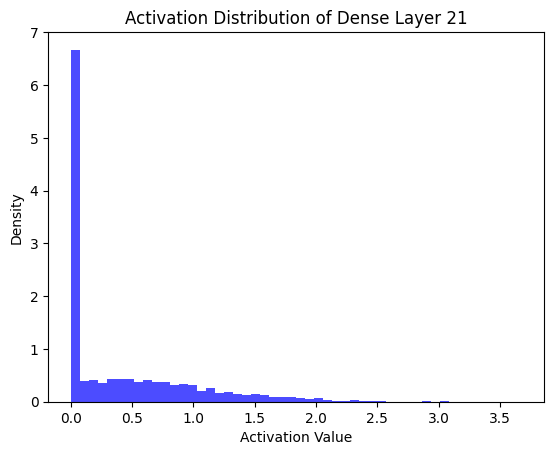

1/1 [==============================] - 1s 806ms/step


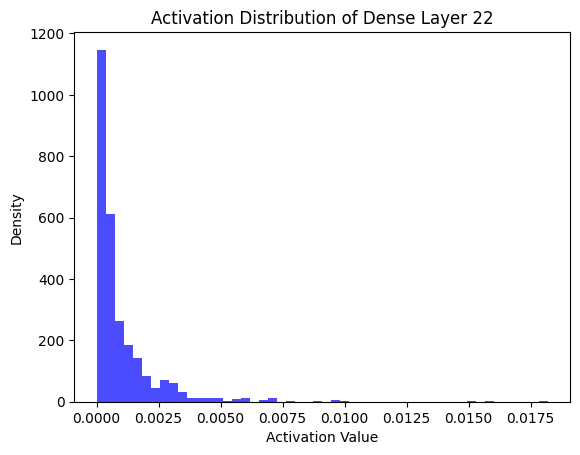

In [ ]:
# Load your data and model here
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0


# Choose the index of the dense layer for which you want to visualize activations
dense_layer_index20 = 20
# Get activations for the chosen dense layer (assuming you have your model and data loaded)
activation_model1= tf.keras.Model(inputs=model.input, outputs=model.layers[dense_layer_index20].output)
dense_activations = activation_model1.predict(train_images_resized)

# Flatten the activations
flat_activations1 = dense_activations.flatten()

# Plot the activation distribution using a histogram
plt.hist(flat_activations1, bins=50, density=True, alpha=0.7, color='blue')
plt.title(f'Activation Distribution of Dense Layer {dense_layer_index20}')
plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.show()


# Choose the index of the dense layer for which you want to visualize activations
dense_layer_index21 = 21
# Get activations for the chosen dense layer (assuming you have your model and data loaded)
activation_model2= tf.keras.Model(inputs=model.input, outputs=model.layers[dense_layer_index21].output)
dense_activations2 = activation_model2.predict(train_images_resized)

# Flatten the activations
flat_activations2 = dense_activations2.flatten()

# Plot the activation distribution using a histogram
plt.hist(flat_activations2, bins=50, density=True, alpha=0.7, color='blue')
plt.title(f'Activation Distribution of Dense Layer {dense_layer_index21}')
plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.show()

# Choose the index of the dense layer for which you want to visualize activations
dense_layer_index22 = 22
# Get activations for the chosen dense layer (assuming you have your model and data loaded)
activation_model= tf.keras.Model(inputs=model.input, outputs=model.layers[dense_layer_index22].output)
dense_activations = activation_model.predict(train_images_resized)

# Flatten the activations
flat_activations = dense_activations.flatten()

# Plot the activation distribution using a histogram
plt.hist(flat_activations, bins=50, density=True, alpha=0.7, color='blue')
plt.title(f'Activation Distribution of Dense Layer {dense_layer_index22}')
plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.show()

What do you notice about the distributions, and how they compare to those of the weight tensors?

**Question 6**

Answer:

Dense layers focus on global patterns and high-level features, while convolutional layers specialize in local pattern extraction and spatial hierarchies. Their respective distributions provide insights into how these layers process and represent data. Activation distributions of dense layers are often visualized to understand how information transforms through fully connected architectures. Weight tensor distributions of convolutional layers can be visualized to analyze the learned spatial filters and their properties.